In [105]:
import pandas as pd
import numpy as np
df=pd.read_csv('./player_12_1.csv')
df.columns

Index(['Unnamed: 0', 'match_id', 'p1_ace', 'p1_winner', 'p1_double_fault',
       'p1_unf_err', 'p1_net_pt', 'p1_server', 'player1_strength',
       'p1_distance_run_normal', 'player1_dist', 'p1_victor', 'p1_sets',
       'p1_games', 'p1_score', 'p1_points_won', 'p1_momentum', 'serve_depth',
       'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
       'serve_width_BW', 'serve_width_C', 'serve_width_W'],
      dtype='object')

In [137]:
df=pd.read_csv('./player_12_1.csv')
df.loc[df['p1_server'] == 0, ['serve_depth', 'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
                                'serve_width_BW', 'serve_width_C', 'serve_width_W']] *= -1
# df[df['player1_dist'].isna()==True]['player1_dist']

## PCA analysis

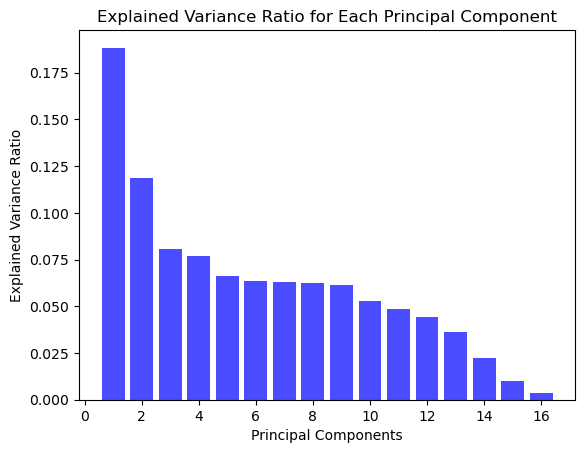

In [142]:
# 'p1_sets',
#        'p1_games', 'p1_score', 'p1_points_won', 'p1_momentum', 'serve_depth',
#        'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
#        'serve_width_BW', 'serve_width_C', 'serve_width_W']
df=pd.read_csv('./player_12_1.csv')
df.loc[df['p1_server'] == 0, ['serve_depth', 'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
                                'serve_width_BW', 'serve_width_C', 'serve_width_W']] *= -1
# df[df['player1_dist'].isna()==True]['player1_dist']

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# df['player1_dist']=df['player1_dist'].fillna(0.5)
df_cleaned = df.applymap(lambda x: np.random.choice([0, 1]) if pd.isna(x) else x)
df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.loc[df_cleaned['p1_momentum'] > 3, 'p1_momentum'] = 3

df_cleaned['p1_score'] = df_cleaned['p1_score'].replace(['AD'], 50, regex=True)
columns_for_pca = ['serve_depth',
       'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
       'serve_width_BW', 'serve_width_C', 'serve_width_W','p1_momentum','p1_sets',
       'p1_games', 'p1_score', 'p1_points_won','player1_strength',
       'p1_distance_run_normal', 'player1_dist',]



# 标准化数据
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_cleaned[columns_for_pca])

# 计算 PCA 的解释方差
pca = PCA()
pca.fit(df_standardized)

# 绘制解释方差累积百分比的曲线
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='blue', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [143]:
df_cleaned

,Unnamed: 0,match_id,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_server,player1_strength,p1_distance_run_normal,...,p1_points_won,p1_momentum,serve_depth,return_depth,speed_mph,serve_width_B,serve_width_BC,serve_width_BW,serve_width_C,serve_width_W
0,0,2023-wimbledon-1301,0,0,0,1,0,1,0.000000,-0.593118,...,0,0,0.0,0.0,95.0,0,1,0,0,0
1,1,2023-wimbledon-1301,0,0,0,0,0,1,0.500000,-0.648485,...,1,0,1.0,0.0,118.0,1,0,0,0,0
2,2,2023-wimbledon-1301,0,0,0,1,0,1,0.333333,-0.014995,...,1,1,0.0,1.0,120.0,1,0,0,0,0
3,3,2023-wimbledon-1301,0,1,0,0,0,1,0.500000,2.750213,...,2,0,1.0,1.0,130.0,0,0,1,0,0
4,4,2023-wimbledon-1301,1,1,0,0,0,1,0.600000,-0.989725,...,3,1,0.0,1.0,112.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,2023-wimbledon-1701,0,0,0,0,1,0,0.500000,2.726725,...,165,2,-0.0,-1.0,-123.0,0,0,0,-1,0
14564,14564,2023-wimbledon-1701,0,0,0,0,0,0,0.498489,1.021317,...,165,0,-0.0,-0.0,-114.0,0,0,0,0,-1
14565,14565,2023-wimbledon-1701,0,1,0,0,0,0,0.500000,0.327688,...,166,0,-0.0,-1.0,-124.0,0,0,0,0,-1
14566,14566,2023-wimbledon-1701,0,0,0,0,0,0,0.498498,-0.244897,...,166,1,-0.0,-1.0,-130.0,0,0,0,-1,0


In [144]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_standardized)

# 将 PCA 结果添加到 DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3','PC4'])

# 显示最终的 DataFrame 包括原始数据和 PCA 结果
df_cleaned = pd.concat([df_cleaned, df_pca], axis=1)
df_cleaned

,Unnamed: 0,match_id,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_server,player1_strength,p1_distance_run_normal,...,speed_mph,serve_width_B,serve_width_BC,serve_width_BW,serve_width_C,serve_width_W,PC1,PC2,PC3,PC4
0,0,2023-wimbledon-1301,0,0,0,1,0,1,0.000000,-0.593118,...,95.0,0,1,0,0,0,-1.050905,4.019969,-3.226075,-2.341220
1,1,2023-wimbledon-1301,0,0,0,0,0,1,0.500000,-0.648485,...,118.0,1,0,0,0,0,-1.965256,2.014395,-0.974690,-0.213883
2,2,2023-wimbledon-1301,0,0,0,1,0,1,0.333333,-0.014995,...,120.0,1,0,0,0,0,-1.972622,2.539236,-0.373897,-1.496970
3,3,2023-wimbledon-1301,0,1,0,0,0,1,0.500000,2.750213,...,130.0,0,0,1,0,0,-2.521229,1.946679,-0.039153,-0.143479
4,4,2023-wimbledon-1301,1,1,0,0,0,1,0.600000,-0.989725,...,112.0,0,0,0,0,1,-2.342134,1.417409,0.825415,0.990246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,2023-wimbledon-1701,0,0,0,0,1,0,0.500000,2.726725,...,-123.0,0,0,0,-1,0,2.367848,-3.028575,0.028794,1.407339
14564,14564,2023-wimbledon-1701,0,0,0,0,0,0,0.498489,1.021317,...,-114.0,0,0,0,0,-1,2.045045,-2.729240,-0.558824,-1.313045
14565,14565,2023-wimbledon-1701,0,1,0,0,0,0,0.500000,0.327688,...,-124.0,0,0,0,0,-1,2.650396,-2.747915,-0.614287,-0.970390
14566,14566,2023-wimbledon-1701,0,0,0,0,0,0,0.498498,-0.244897,...,-130.0,0,0,0,-1,0,2.051835,-2.933631,-0.320828,0.816428


## LR

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# df=pd.read_csv('./player_12_1.csv')

# df['p1_sets'].unique()

# 假设df是你的DataFrame
# X是前9列特征，y是最后一列目标
used_columns=[ 'p1_ace', 'p1_winner', 'p1_double_fault',
       'p1_unf_err', 'p1_net_pt', 'p1_server', 'PC1','PC2','PC3','PC4']
X = df_cleaned[used_columns]
y = df_cleaned['p1_victor']

# 将数据划分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X.iloc[300:]
X_test=X.iloc[0:300]
y_train=y.iloc[300:]
y_test=y.iloc[:300]

# 创建并训练逻辑回归模型
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# 在测试集上进行预测和获取概率
y_pred = logistic_regression.predict(X_test)
class_probabilities = logistic_regression.predict_proba(X_test)

# 输出模型评估指标
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report_output)
print(logistic_regression.coef_)

# 输出逻辑回归的概率
# for i in range(len(X_test)):
#     print(f"True Label: {y_test.iloc[i]}, Predicted Label: {y_pred[i]}, Class Probabilities: {class_probabilities[i]}")
#     print(X_test.iloc[i])

Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       142
           1       0.80      0.70      0.75       158

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300

[[ 0.44459437  5.78754508 -0.70518144 -6.16171854 -0.12278273  1.14899325
  -0.23549424 -0.08429316  0.06900726  0.27255455]]


In [164]:
df_cleaned.columns

Index(['Unnamed: 0', 'match_id', 'p1_ace', 'p1_winner', 'p1_double_fault',
       'p1_unf_err', 'p1_net_pt', 'p1_server', 'player1_strength',
       'p1_distance_run_normal', 'player1_dist', 'p1_victor', 'p1_sets',
       'p1_games', 'p1_score', 'p1_points_won', 'p1_momentum', 'serve_depth',
       'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
       'serve_width_BW', 'serve_width_C', 'serve_width_W', 'PC1', 'PC2', 'PC3',
       'PC4'],
      dtype='object')

In [148]:
logistic_regression.coef_

array([[ 0.44459437,  5.78754508, -0.70518144, -6.16171854, -0.12278273,
         1.14899325, -0.23549424, -0.08429316,  0.06900726,  0.27255455]])

In [165]:
X.columns

Index(['p1_ace', 'p1_winner', 'p1_double_fault', 'p1_unf_err', 'p1_net_pt',
       'p1_server', 'PC1', 'PC2', 'PC3', 'PC4'],
      dtype='object')

In [166]:
len(df[(df['p1_victor']==0) & (df['p1_server'])==1])

2381

In [167]:
print(len(df[(df['p1_victor'] ==1) & (df['p1_server'] == 0)][['p1_server','p1_server']]))
print(len(df[(df['p1_victor'] ==0) & (df['p1_server'] == 0)][['p1_server','p1_server']]))



2381
4903


In [175]:
# np.log(probability*10+1)
len(df_cleaned)/2

7284.0

In [176]:
# df_row=pd.read_csv('./cleaned_N01.csv')
# df_row

In [170]:
df_row_1=df_row[df_row['match_id']=='2023-wimbledon-1301']
df_row_1['player1_dist'] = df_row_1['player1_dist'].fillna(0.5)
df_row_1['player2_dist'] = df_row_1['player2_dist'].fillna(0.5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30896\1911304982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row_1['player1_dist'] = df_row_1['player1_dist'].fillna(0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30896\1911304982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row_1['player2_dist'] = df_row_1['player2_dist'].fillna(0.5)


In [172]:
# player1
df_cleaned.columns

Index(['Unnamed: 0', 'match_id', 'p1_ace', 'p1_winner', 'p1_double_fault',
       'p1_unf_err', 'p1_net_pt', 'p1_server', 'player1_strength',
       'p1_distance_run_normal', 'player1_dist', 'p1_victor', 'p1_sets',
       'p1_games', 'p1_score', 'p1_points_won', 'p1_momentum', 'serve_depth',
       'return_depth', 'speed_mph', 'serve_width_B', 'serve_width_BC',
       'serve_width_BW', 'serve_width_C', 'serve_width_W', 'PC1', 'PC2', 'PC3',
       'PC4'],
      dtype='object')

In [185]:
import numpy as np
temp=np.array(df_cleaned.columns)
player1=df_cleaned.iloc[0:int(len(df_cleaned)/2)]
temp=[s.replace('1', '2') if '1' in s else s for s in temp]
player2=df_cleaned.iloc[int(len(df_cleaned)/2):]
player2.columns=player1.columns

player1 = player1.reset_index(drop=True)
player2 = player2.reset_index(drop=True)


player1['performance']=logistic_regression.predict_proba(player1[used_columns])[:,1]
player2['performance']=logistic_regression.predict_proba(player2[used_columns])[:,1]

temp_1=player1['performance']*player1['p1_server']*2381/(2381+4903)
temp_2=player1['performance']*(1-player1['p1_server'])*4903/(2381+4903)
player1['performance']=temp_1+temp_2
player1['performance']=np.log(player1['performance']*10+1)

temp_1=player2['performance']*player2['p1_server']*2381/(2381+4903)
temp_2=player2['performance']*(1-player2['p1_server'])*4903/(2381+4903)
player2['performance']=temp_1+temp_2
player2['performance']=np.log(player2['performance']*10+1)

In [186]:
temp_1+temp_2

0       0.317094
1       0.176276
2       0.248697
3       0.194954
4       0.139943
          ...   
7279    0.247495
7280    0.161804
7281    0.666324
7282    0.248124
7283    0.250445
Length: 7284, dtype: float64

In [187]:
player1['performance'][:5]

0    0.005056
1    1.183271
2    0.010856
3    1.450501
4    1.450966
Name: performance, dtype: float64

In [188]:
player2['performance'][:5]

0    1.428141
1    1.016232
2    1.249034
3    1.081650
4    0.875233
Name: performance, dtype: float64

In [189]:
pd.DataFrame({'performance1':player1['performance'],
              'performance2':player2['performance']}).T.to_csv('performance.csv')

In [190]:
p1_current_per=[]
p2_current_per=[]
p1_overall_per=[]
p2_overall_per=[]
maximum_pt=np.log((4803/(2381+4803))*10+1)

p1_current_per.append(player1['performance'][0])
p1_current_per.append((player1['performance'][0]+player1['performance'][1])/(2*maximum_pt))
p2_current_per.append(player2['performance'][0])
p2_current_per.append((player2['performance'][0]+player2['performance'][1])/(2*maximum_pt))
p1_overall_per.append(player2['performance'][0])
p2_overall_per.append(player2['performance'][0])


for i in range(len(player2)-2):
    p1_current_per.append((player1['performance'][i]+player1['performance'][i+1]+player1['performance'][i+2])/(3*maximum_pt))
    p2_current_per.append((player2['performance'][i]+player2['performance'][i+1]+player2['performance'][i+2])/(3*maximum_pt))
    

for i in range(len(player2)-1):
    p1_overall_per.append((player1['performance'][i+1]/(maximum_pt*(i+2))
                           +p1_overall_per[-1]*((i+1)/(i+2))))
    p2_overall_per.append((player2['performance'][i+1]/(maximum_pt*(i+2))
                           +p2_overall_per[-1]*((i+1)/(i+2))))



In [191]:
# # np.array([p1_current_per,p2_current_per]).T
# def softmax(x):
#     # 对每行进行softmax操作
#     exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
#     softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
#     return softmax_x
# result = softmax(np.array([p1_current_per, p2_current_per]).T)
# p1_current_per, p2_current_per = result[:, 0], result[:, 1]
# result = softmax(np.array([np.array(p1_overall_per),np.array(p2_overall_per)]).T)
# p1_overall_per, p2_overall_per = result[:, 0], result[:, 1]

# p1_current_per=softmax(np.array([p1_current_per,p2_current_per]).T)[:,0]
# p2_current_per=softmax(np.array([p1_current_per,p2_current_per]).T)[:,1]
# p1_overall_per=softmax(np.array([p1_overall_per,p2_overall_per]).T)[:,0]
# p2_overall_per=softmax(np.array([p1_overall_per,p2_overall_per]).T)[:,1]

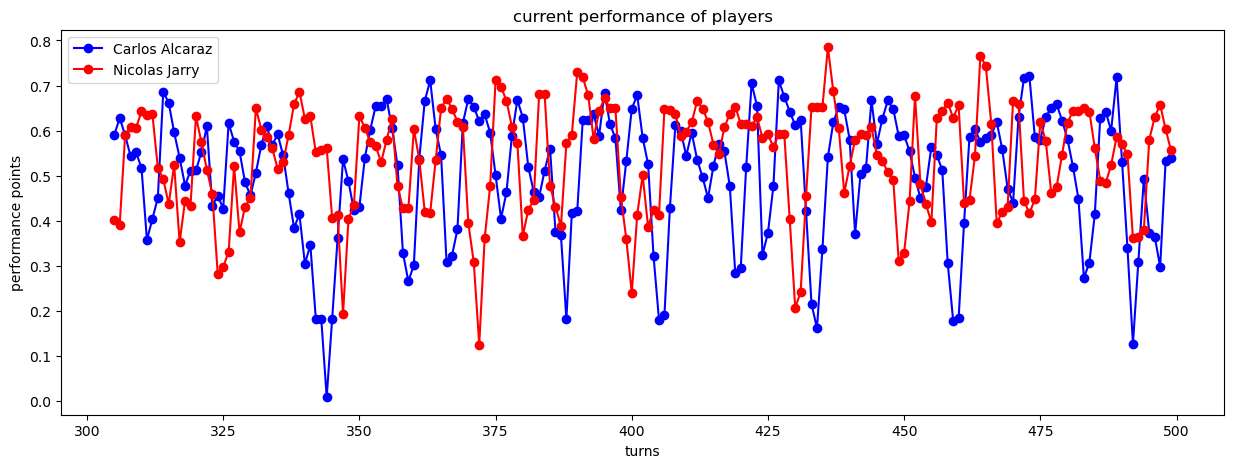

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
p1_current_per

# 获取数组长度
x = np.arange(len(p1_current_per))

# 绘制折线图
plt.figure(figsize=(15,5))
plt.plot(x[305:500], p1_current_per[305:500], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[305:500], p2_current_per[305:500], marker='o', linestyle='-', color='r', label='Nicolas Jarry')
# 添加标签和标题
plt.xlabel('turns')
plt.ylabel('performance points')
plt.title('current performance of players')

# 添加图例
plt.legend()

# 显示图形
plt.show()

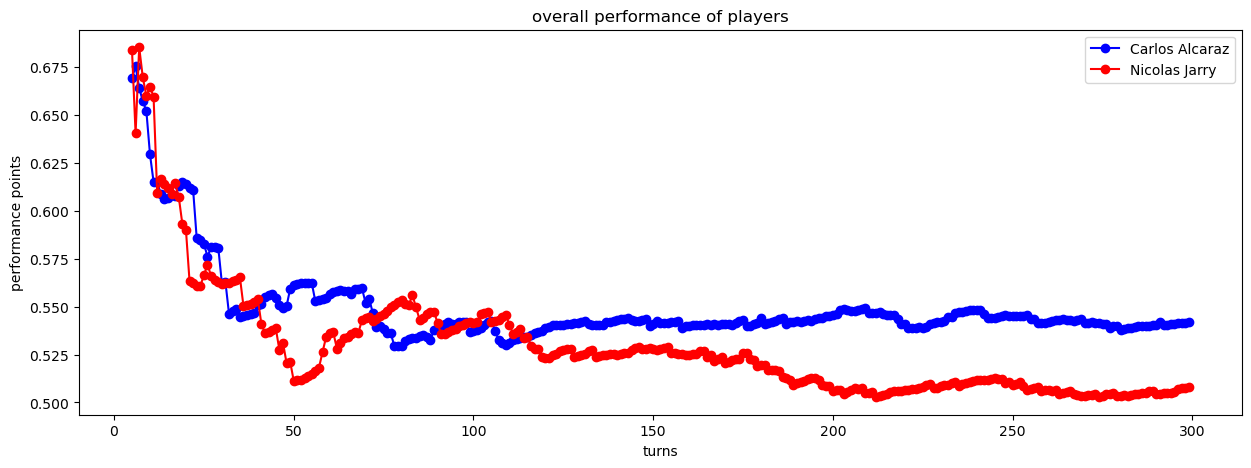

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
p1_current_per

# 获取数组长度
x = np.arange(len(p1_current_per))

# 绘制折线图
plt.figure(figsize=(15,5))
plt.plot(x[5:300], p1_overall_per[5:300], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:300], p2_overall_per[5:300], marker='o', linestyle='-', color='r', label='Nicolas Jarry')

# 添加标签和标题
plt.xlabel('turns')
plt.ylabel('performance points')
plt.title('overall performance of players')

# 添加图例
plt.legend()

# 显示图形
plt.show()

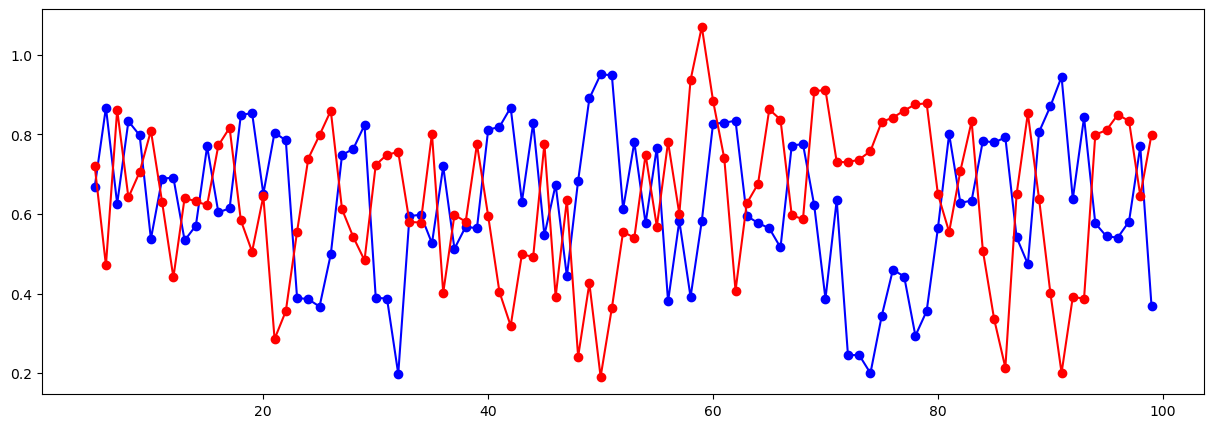

In [243]:
temp_1=p1_current_per+player1['p1_victor']*0.2
temp_2=p2_current_per+player2['p1_victor']*0.2

x = np.arange(len(temp_1))


plt.figure(figsize=(15,5))
plt.plot(x[5:100], temp_1[5:100], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:100], temp_2[5:100], marker='o', linestyle='-', color='r', label='Nicolas Jarry')

p1_performance_plus=temp_1
p2_performance_plus=temp_2


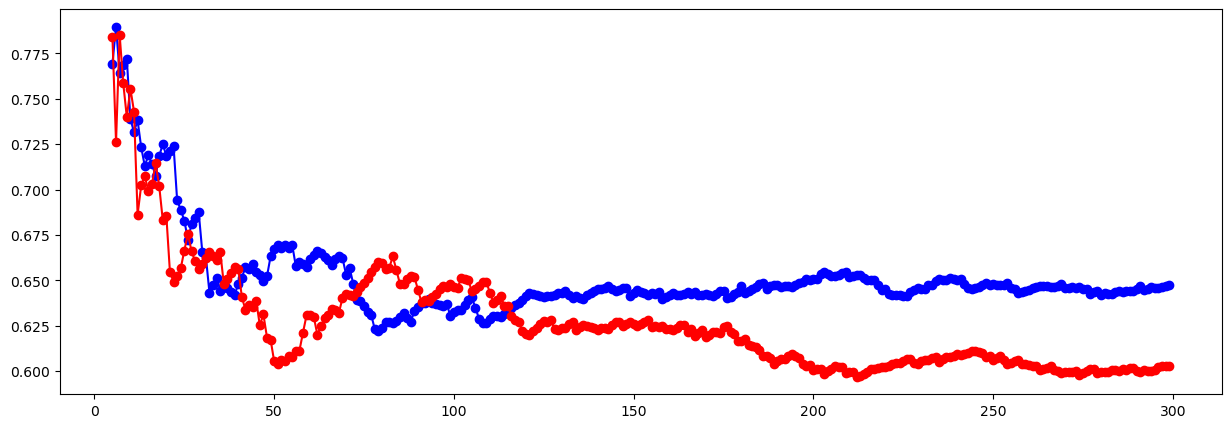

In [244]:
import numpy as np

temp_1 = np.array([])
temp_2 = np.array([])

for match_id in player1['match_id'].unique():
    temp_player1 = player1[player1['match_id'] == match_id]
    cumulative_sum_player1 = np.cumsum(temp_player1['p1_victor'])
    temp_1 = np.append(temp_1, cumulative_sum_player1 * 0.2 / np.arange(1, len(temp_player1) + 1))

    temp_player2 = player2[player2['match_id'] == match_id]
    cumulative_sum_player2 = np.cumsum(temp_player2['p1_victor'])
    temp_2 = np.append(temp_2, cumulative_sum_player2 * 0.2 / np.arange(1, len(temp_player2) + 1))

temp_1 = np.array(temp_1)
temp_2 = np.array(temp_2)


# temp_1=[sum(player1['p1_victor'][:i + 1]) for i in range(len(player1['p1_victor'][:i + 1]))]
# temp_1=[temp_1/(i+1) for i in range(len(temp_1))]
temp_1=temp_1+p1_overall_per
# temp_2=[sum(player2['p1_victor'][:i + 1]) for i in range(len(player2['p1_victor'][:i + 1]))]*0.2
# temp_2=[temp_2/(i+1) for i in len(temp_2)]
temp_2=temp_2+p2_overall_per

x = np.arange(len(temp_1))

plt.figure(figsize=(15,5))
plt.plot(x[5:300], temp_1[5:300], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:300], temp_2[5:300], marker='o', linestyle='-', color='r', label='Nicolas Jarry')

In [235]:
# np.array([sum(player1['p1_victor'][:i + 1]) for i in range(len(player1['p1_victor'][:i + 1]))])*0.1

In [236]:
np.mean(p2_current_per)

0.5191804047024654

In [237]:
maximum_pt

2.039360213314633

In [204]:
pd.DataFrame({'p1_current_per':p1_current_per,
              'p1_overall_per':p1_overall_per,
              'p2_current_per':p2_current_per,
              'p2_overall_per':p2_overall_per}).to_csv('performance.csv')

In [246]:
pd.DataFrame({'p1_current_per':p1_performance_plus,
              'p2_current_per':p2_performance_plus,
              'p1_overall_per':temp_1,
              'p2_overall_per':temp_2}).to_csv('performance_plus.csv')

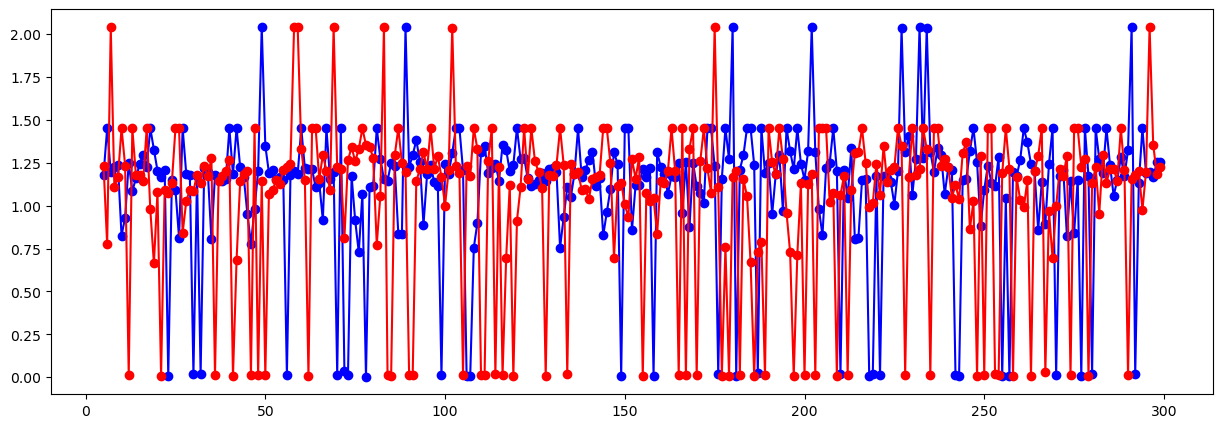

In [239]:
temp_1=player1['performance']
temp_2=player2['performance']

x = np.arange(len(temp_1))

plt.figure(figsize=(15,5))
plt.plot(x[5:300], temp_1[5:300], marker='o', linestyle='-', color='b', label='Carlos Alcaraz')
plt.plot(x[5:300], temp_2[5:300], marker='o', linestyle='-', color='r', label='Nicolas Jarry')